In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
PROJECT_PATH = Path('/home/wak/toprak-lab/aml_drug_synergy')

In [2]:
#experiments = ['ETECS02', 'ETECS03']
cell_lines = ['FKH1', 'HL60', 'K562', 'TF1', 'IDH2', 'Kasumi1']

#### Read rawdata

In [3]:
raw = {}
for line in cell_lines:
    datafile = PROJECT_PATH / 'data/raw_single_agent' / (line + '_SingleAgent.txt')
    if datafile.is_file():
        raw[line] = pd.read_csv(datafile, sep='\t')
        #print(exp,line,raw[(exp,line)].columns)
merged = pd.concat(raw.values())
merged

,Index,Plate,Plate ID,Row,Column,Compound,Conc. [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Corrected,Plate Mask,New Layer: Timestamp,New Layer: Raw,New Layer: Normalized,Normalized,Correction Factor
0,1,1,ETECS03 FKH1_1,A,1,NaN,-,Compound,NaN,NaN,21.09.2021 16:25:05,518400.0,9.325573,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,ETECS03 FKH1_1,A,2,NaN,-,Compound,NaN,NaN,21.09.2021 16:25:05,489880.0,3.310979,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,ETECS03 FKH1_1,A,3,NaN,-,Compound,NaN,NaN,21.09.2021 16:25:05,424120.0,-10.557170,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,ETECS03 FKH1_1,A,4,NaN,-,Compound,NaN,NaN,21.09.2021 16:25:05,413400.0,-12.817920,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,ETECS03 FKH1_1,A,5,NaN,-,Compound,NaN,NaN,21.09.2021 16:25:05,413800.0,-12.733560,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,9212,24,ETESC03 Kasumi1_24,P,20,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,2774720.0,47.481660,NaN,NaN,NaN,NaN,47.48166,0.0
9212,9213,24,ETESC03 Kasumi1_24,P,21,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,2819560.0,49.864990,NaN,NaN,NaN,NaN,49.86499,0.0
9213,9214,24,ETESC03 Kasumi1_24,P,22,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,2641640.0,40.408210,NaN,NaN,NaN,NaN,40.40821,0.0
9214,9215,24,ETESC03 Kasumi1_24,P,23,NaN,-,Compound,NaN,NaN,26.04.2021 11:32:29,3013280.0,60.161580,NaN,NaN,NaN,NaN,60.16158,0.0


In [4]:
len(merged['Plate ID'].unique())

204

In [5]:
drug_names = pd.read_csv(PROJECT_PATH / 'data/meta/Drug_names.txt', sep='\t')
drug_names

,HTS-NAME,SHORT-DRUG-NAME,DRUG-NAME
0,SW196654-6,ATRA,All-trans-retinoic-acid
1,SW197516-3,IDA,Idarubicin
2,SW198953-3,DAU,Daunorubicin
3,SW196745-7,Mito,Mitoxantrone
4,SW197795-10,VP16,Etoposide
5,SW199332-5,AZC,Azacitidine
6,SW199613-2,FLD,Fludarabine
7,SW197450-6,AraC,Cytarabine
8,SW197746-5,2CdA,Cladribine
9,SW198601-4,MTX,Methotrexate


In [6]:
# replace compound names with human-readable names
for i in drug_names.index:
    merged.loc[merged['Compound'] == drug_names.loc[i,'HTS-NAME'], 'Compound'] = drug_names.loc[i,'SHORT-DRUG-NAME']

In [7]:
# create cell line column
merged['Cell Line'] = merged['Plate ID'].apply(lambda x: (match.group(1) if (match := re.search('.+?\s+(.+?)[_-]', x)) else ''))
merged['Normalized'] = merged['Normalized'].astype('float')
merged['Conc. [uM]'] = pd.to_numeric(merged['Conc. [uM]'], errors='coerce')

In [8]:
merged.to_csv(PROJECT_PATH / 'data/raw_single_agent/combined-single-agent-data.tsv', sep='\t')
merged

,Index,Plate,Plate ID,Row,Column,Compound,Conc. [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Corrected,Plate Mask,New Layer: Timestamp,New Layer: Raw,New Layer: Normalized,Normalized,Correction Factor,Cell Line
0,1,1,ETECS03 FKH1_1,A,1,NaN,NaN,Compound,NaN,NaN,21.09.2021 16:25:05,518400.0,9.325573,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
1,2,1,ETECS03 FKH1_1,A,2,NaN,NaN,Compound,NaN,NaN,21.09.2021 16:25:05,489880.0,3.310979,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
2,3,1,ETECS03 FKH1_1,A,3,NaN,NaN,Compound,NaN,NaN,21.09.2021 16:25:05,424120.0,-10.557170,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
3,4,1,ETECS03 FKH1_1,A,4,NaN,NaN,Compound,NaN,NaN,21.09.2021 16:25:05,413400.0,-12.817920,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
4,5,1,ETECS03 FKH1_1,A,5,NaN,NaN,Compound,NaN,NaN,21.09.2021 16:25:05,413800.0,-12.733560,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,9212,24,ETESC03 Kasumi1_24,P,20,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2774720.0,47.481660,NaN,NaN,NaN,NaN,47.48166,0.0,Kasumi1
9212,9213,24,ETESC03 Kasumi1_24,P,21,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2819560.0,49.864990,NaN,NaN,NaN,NaN,49.86499,0.0,Kasumi1
9213,9214,24,ETESC03 Kasumi1_24,P,22,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,2641640.0,40.408210,NaN,NaN,NaN,NaN,40.40821,0.0,Kasumi1
9214,9215,24,ETESC03 Kasumi1_24,P,23,NaN,NaN,Compound,NaN,NaN,26.04.2021 11:32:29,3013280.0,60.161580,NaN,NaN,NaN,NaN,60.16158,0.0,Kasumi1


#### Verify combination and control well counts per plate

In [9]:
well_counts=[merged[merged['Plate ID']==plate_id]['Well Type'].value_counts().to_frame(name=plate_id) for plate_id in merged['Plate ID'].unique()]
well_counts = pd.concat(well_counts,axis=1,)
well_counts['well_type'] = well_counts.index
well_counts

/tmp/ipykernel_45853/162392634.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  well_counts['well_type'] = well_counts.index


,ETECS03 FKH1_1,ETECS03 FKH1_2,ETECS03 FKH1_3,ETECS03 FKH1_4,ETECS03 FKH1_5,ETECS03 FKH1_6,ETECS03 FKH1_7,ETECS03 FKH1_8,ETECS03 FKH1_9,ETECS03 FKH1_10,...,ETESC03 Kasumi1_16,ETESC03 Kasumi1_17,ETESC03 Kasumi1_18,ETESC03 Kasumi1_19,ETESC03 Kasumi1_20,ETESC03 Kasumi1_21,ETESC03 Kasumi1_22,ETESC03 Kasumi1_23,ETESC03 Kasumi1_24,well_type
Well Type,,,,,,,,,,,,,,,,,,,,,
Compound,336,336,336,336,336,336,336,336,336,336,...,336,336,336,336,336,336,336,336,336,Compound
Neutral Control,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,Neutral Control
Inhibitor Control,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,Inhibitor Control


In [10]:
well_counts_melted = well_counts.melt(id_vars=['well_type'])
well_counts_melted.to_csv(PROJECT_PATH / 'dump/qc/well_types.tsv', sep='\t')
well_counts_melted

,well_type,variable,value
0,Compound,ETECS03 FKH1_1,336.0
1,Neutral Control,ETECS03 FKH1_1,32.0
2,Inhibitor Control,ETECS03 FKH1_1,16.0
3,Compound,ETECS03 FKH1_2,336.0
4,Neutral Control,ETECS03 FKH1_2,32.0
...,...,...,...
607,Neutral Control,ETESC03 Kasumi1_23,32.0
608,Inhibitor Control,ETESC03 Kasumi1_23,16.0
609,Compound,ETESC03 Kasumi1_24,336.0
610,Neutral Control,ETESC03 Kasumi1_24,32.0


#### Verify control well values of each plate

In [11]:
merged[merged['Well Type']=='Neutral Control'].groupby(['Plate ID'])[['Raw','Normalized']].agg(np.mean)

,Raw,Normalized
Plate ID,,
ETEC03 K562_1,8870805.00,NaN
ETEC03 K562_10,6259180.00,NaN
ETEC03 K562_11,6791065.00,NaN
ETEC03 K562_12,6611761.25,NaN
ETEC03 K562_13,6495037.50,NaN
...,...,...
ETESC03 Kasumi1_5,2472597.50,1.589938
ETESC03 Kasumi1_6,2092990.00,3.385100
ETESC03 Kasumi1_7,2207537.50,3.505167


In [12]:
pd.concat([merged[merged['Well Type']=='Inhibitor Control'].groupby(['Plate ID'])[['Raw','Normalized']].agg(np.mean),
           merged[merged['Well Type']=='Inhibitor Control'].groupby(['Plate ID'])[['Raw','Normalized']].agg(np.std)], axis=1)

,Raw,Normalized,Raw,Normalized
Plate ID,,,,
ETEC03 K562_1,422060.0,NaN,27690.749358,NaN
ETEC03 K562_10,268270.0,NaN,16754.271097,NaN
ETEC03 K562_11,280467.5,NaN,13844.421018,NaN
ETEC03 K562_12,253712.5,NaN,12834.181184,NaN
ETEC03 K562_13,244357.5,NaN,14368.034660,NaN
...,...,...,...,...
ETESC03 Kasumi1_5,40015.0,-98.355929,6021.169322,0.247388
ETESC03 Kasumi1_6,38920.0,-98.077510,5851.295013,0.289031
ETESC03 Kasumi1_7,40232.5,-98.113615,5579.127172,0.261589


In [13]:
inh_controls = merged[(merged['Well Type']=='Inhibitor Control')]
neutral_controls = merged[(merged['Well Type']=='Neutral Control')]
inh_controls

,Index,Plate,Plate ID,Row,Column,Compound,Conc. [uM],Well Type,Masked,Well Tags,Timestamp,Raw,Corrected,Plate Mask,New Layer: Timestamp,New Layer: Raw,New Layer: Normalized,Normalized,Correction Factor,Cell Line
292,293,1,ETECS03 FKH1_1,M,5,NaN,NaN,Inhibitor Control,NaN,NaN,21.09.2021 16:25:05,7520.0,-98.41411,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
293,294,1,ETECS03 FKH1_1,M,6,NaN,NaN,Inhibitor Control,NaN,NaN,21.09.2021 16:25:05,6280.0,-98.67561,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
294,295,1,ETECS03 FKH1_1,M,7,NaN,NaN,Inhibitor Control,NaN,NaN,21.09.2021 16:25:05,6440.0,-98.64187,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
295,296,1,ETECS03 FKH1_1,M,8,NaN,NaN,Inhibitor Control,NaN,NaN,21.09.2021 16:25:05,7080.0,-98.50690,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
296,297,1,ETECS03 FKH1_1,M,9,NaN,NaN,Inhibitor Control,NaN,NaN,21.09.2021 16:25:05,7360.0,-98.44785,NaN,NaN,NaN,NaN,NaN,NaN,FKH1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9135,9136,24,ETESC03 Kasumi1_24,M,16,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,29080.0,-98.45434,NaN,NaN,NaN,NaN,-98.45434,0.0,Kasumi1
9136,9137,24,ETESC03 Kasumi1_24,M,17,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,31760.0,-98.31190,NaN,NaN,NaN,NaN,-98.31190,0.0,Kasumi1
9137,9138,24,ETESC03 Kasumi1_24,M,18,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,36840.0,-98.04189,NaN,NaN,NaN,NaN,-98.04189,0.0,Kasumi1
9138,9139,24,ETESC03 Kasumi1_24,M,19,NaN,NaN,Inhibitor Control,NaN,NaN,26.04.2021 11:32:29,39440.0,-97.90369,NaN,NaN,NaN,NaN,-97.90369,0.0,Kasumi1


Text(0.5, 1.0, 'ETECS02-ETECS03 Inhibitor Controls')

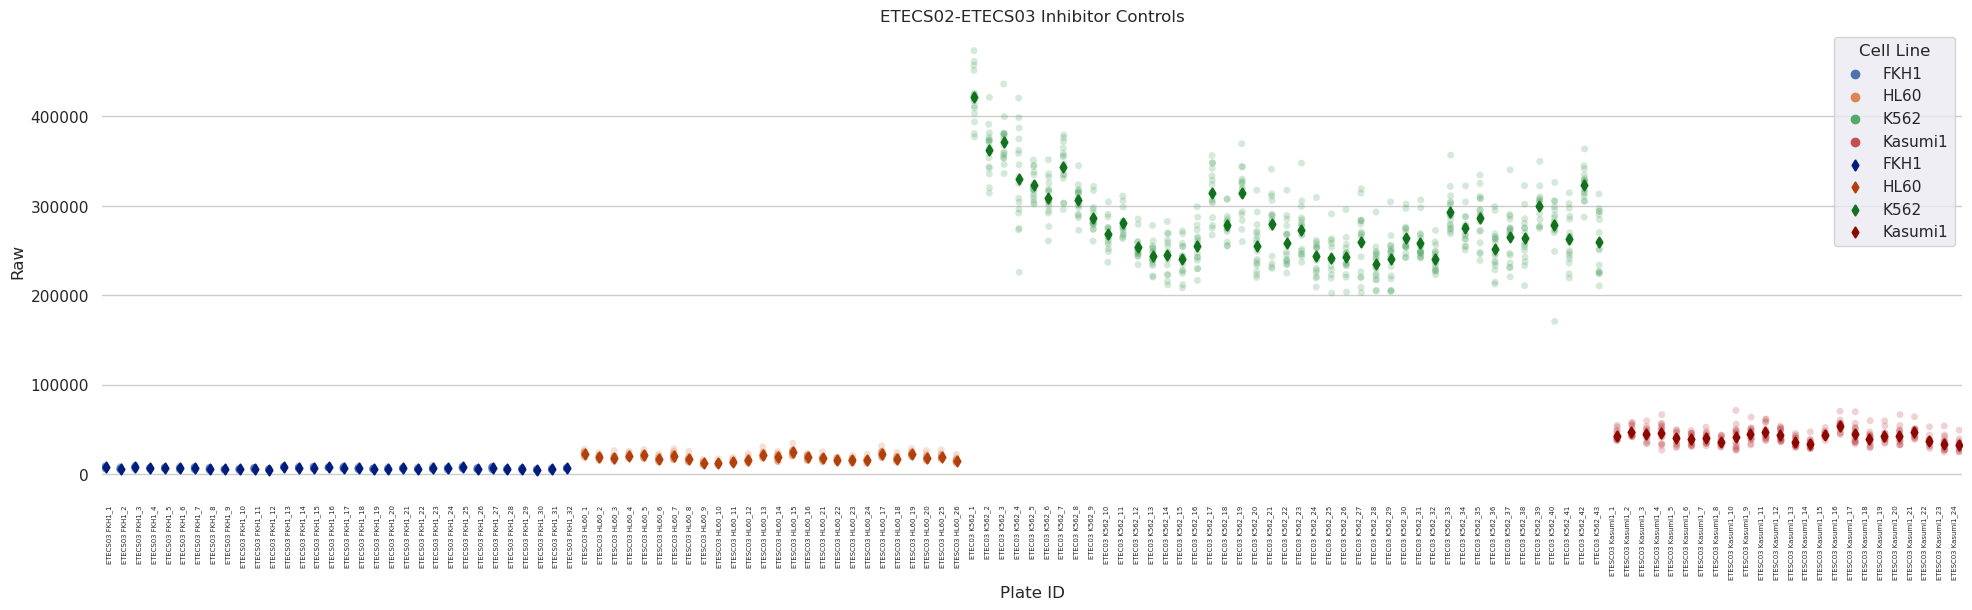

In [14]:
def plot_plate_controls_raw_values(data, x="Plate ID", y="Raw", hue="Cell Line"):
    sns.set_theme(style="whitegrid")
    f, ax = plt.subplots(figsize=(24,6))
    sns.despine(bottom=True, left=True)
    sns.set(font_scale=1)
    sns.stripplot(
        data=data, y=y, x=x, hue=hue,
        dodge=True, alpha=.25, zorder=1, legend=True
    )
    sns.pointplot(
        data=data, y=y, x=x, hue=hue,
        join=False, dodge=.8 - .8 / 3, palette='dark',
        markers="d", scale=.75, errorbar=None
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5);
    return ax
ax = plot_plate_controls_raw_values(inh_controls)
ax.set_title('ETECS02-ETECS03 Inhibitor Controls')

Text(0.5, 1.0, 'ETECS02-ETECS03 Neutral Controls')

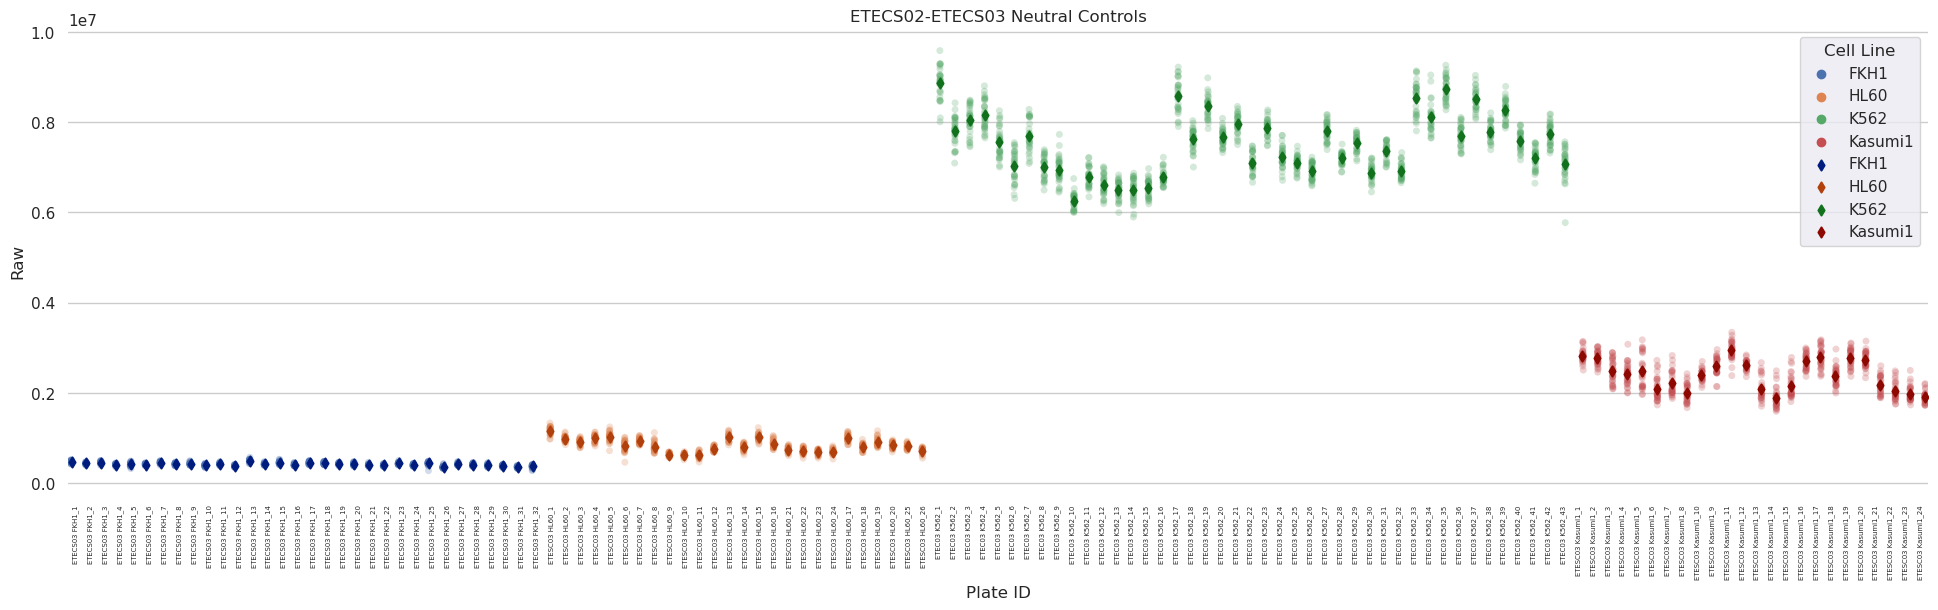

In [15]:
ax = plot_plate_controls_raw_values(neutral_controls)
ax.set_title('ETECS02-ETECS03 Neutral Controls')

In [16]:
merged['Cell Line+Well Type'] = merged['Cell Line']+' '+merged['Well Type']
controls = merged[(merged['Well Type']=='Inhibitor Control') | (merged['Well Type']=='Neutral Control')]

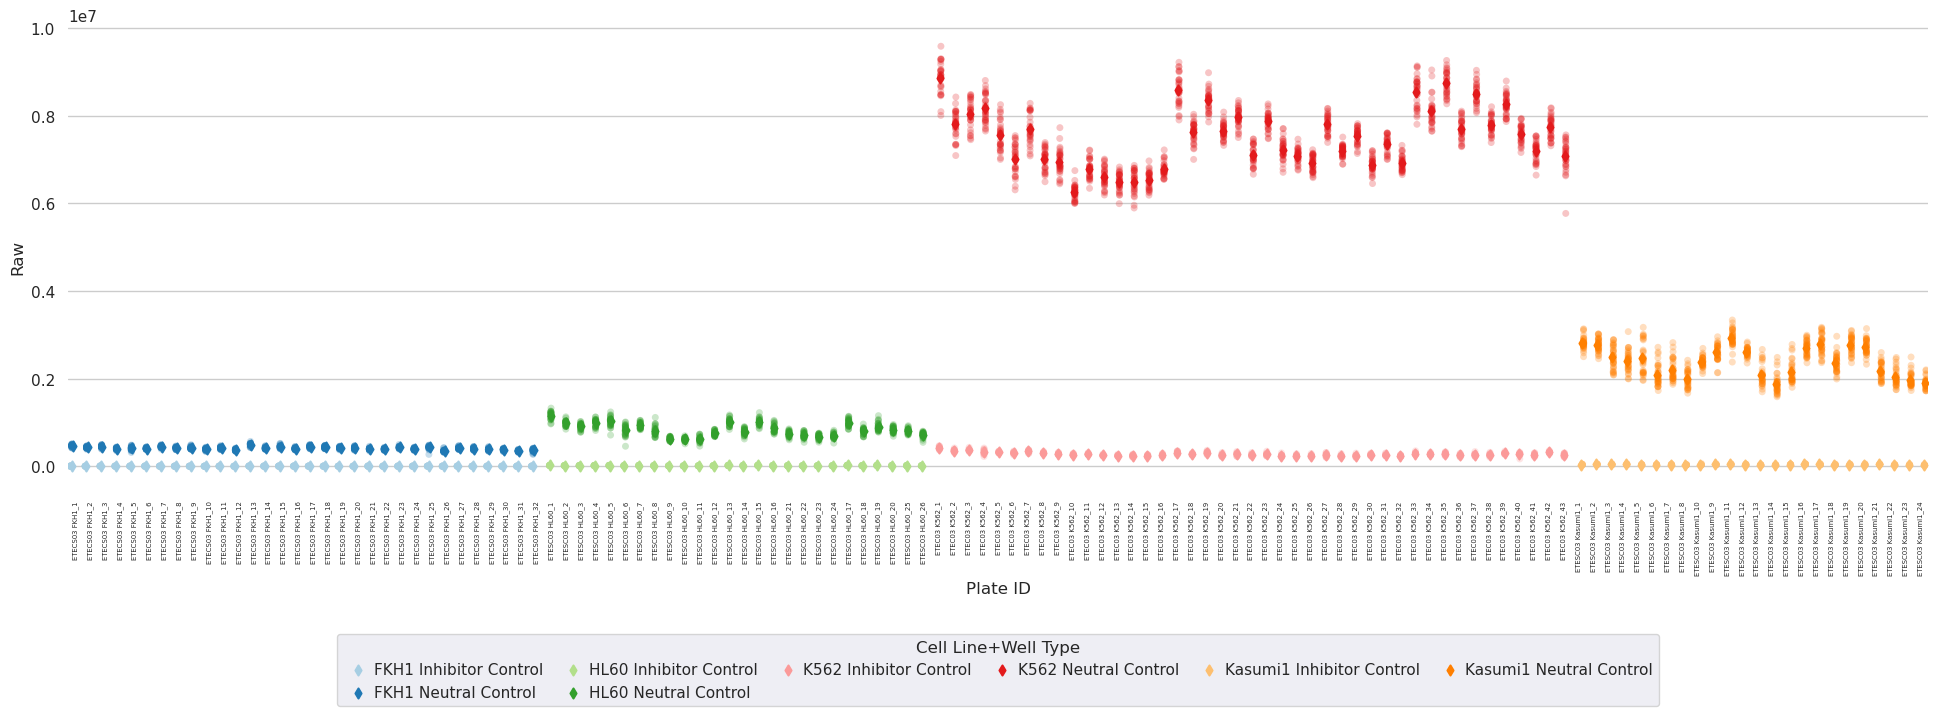

In [17]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(24,6))
sns.despine(bottom=True, left=True)
sns.set(font_scale=1)
sns.stripplot(
    data=controls, y='Raw', x='Plate ID', hue='Cell Line+Well Type', palette='Paired',
    dodge=True, alpha=.25, zorder=1, legend=False
)
sns.pointplot(
    data=controls, y='Raw', x='Plate ID', hue='Cell Line+Well Type',
    join=False, dodge=.8 - .8 / 3, palette='Paired',
    markers="d", scale=.75, errorbar=None
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5);
# Improve the legend
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(.5, -0.3), ncol=6, frameon=True, columnspacing=1, handletextpad=0)

#### Re-normalize based on the median control values

In [18]:
merged.insert(15, 'Normalized2', np.nan)
merged

,Index,Plate,Plate ID,Row,Column,Compound,Conc. [uM],Well Type,Masked,Well Tags,...,Corrected,Plate Mask,New Layer: Timestamp,Normalized2,New Layer: Raw,New Layer: Normalized,Normalized,Correction Factor,Cell Line,Cell Line+Well Type
0,1,1,ETECS03 FKH1_1,A,1,NaN,NaN,Compound,NaN,NaN,...,9.325573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
1,2,1,ETECS03 FKH1_1,A,2,NaN,NaN,Compound,NaN,NaN,...,3.310979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
2,3,1,ETECS03 FKH1_1,A,3,NaN,NaN,Compound,NaN,NaN,...,-10.557170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
3,4,1,ETECS03 FKH1_1,A,4,NaN,NaN,Compound,NaN,NaN,...,-12.817920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
4,5,1,ETECS03 FKH1_1,A,5,NaN,NaN,Compound,NaN,NaN,...,-12.733560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,9212,24,ETESC03 Kasumi1_24,P,20,NaN,NaN,Compound,NaN,NaN,...,47.481660,NaN,NaN,NaN,NaN,NaN,47.48166,0.0,Kasumi1,Kasumi1 Compound
9212,9213,24,ETESC03 Kasumi1_24,P,21,NaN,NaN,Compound,NaN,NaN,...,49.864990,NaN,NaN,NaN,NaN,NaN,49.86499,0.0,Kasumi1,Kasumi1 Compound
9213,9214,24,ETESC03 Kasumi1_24,P,22,NaN,NaN,Compound,NaN,NaN,...,40.408210,NaN,NaN,NaN,NaN,NaN,40.40821,0.0,Kasumi1,Kasumi1 Compound
9214,9215,24,ETESC03 Kasumi1_24,P,23,NaN,NaN,Compound,NaN,NaN,...,60.161580,NaN,NaN,NaN,NaN,NaN,60.16158,0.0,Kasumi1,Kasumi1 Compound


In [25]:
# Calculate Normalized2: Raw absorbance normalized by median neutral controls per plate
#
for plate_id in merged['Plate ID'].unique():
    plate = merged[merged['Plate ID'] == plate_id]
    neutral_median = np.nanmedian(plate.loc[plate['Well Type']=='Neutral Control', 'Raw'].values)
    inhibitor_median = np.nanmedian(plate.loc[plate['Well Type']=='Inhibitor Control', 'Raw'].values)
    merged.loc[merged['Plate ID'] == plate_id, 'Normalized2'] = (merged.loc[merged['Plate ID'] == plate_id,'Raw']-inhibitor_median)/(neutral_median-inhibitor_median)
    if np.isnan(neutral_median) or np.isnan(inhibitor_median):
        print(f"{plate_id}\t{neutral_median}\t{inhibitor_median}")

/home/wak/micromamba/envs/data311/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


ETECS02 TF1-12	nan	nan
ETECS02 TF1-14	nan	nan
ETECS02 TF1-16	nan	nan
ETECS02 TF1-17	nan	nan
ETECS02 TF1-2	nan	nan
ETECS02 TF1-5	nan	nan
ETECS02 TF1-7	nan	nan
ETECS02 TF1-10	nan	nan
ETECS02 TF1-15	nan	nan
ETECS02 TF1-4	nan	nan
ETECS02 TF1-9	nan	nan
ETECS02 TF1-1	nan	nan
ETECS02 TF1-3	nan	nan
ETECS02 TF1-18	nan	nan
ETECS02 TF1-19	nan	nan
ETECS02 TF1-20	nan	nan
ETECS02 TF1-8	nan	nan
ETECS02 TF1-6	nan	nan
ETECS02 TF1-21	nan	nan
ETECS02 TF1-11	nan	nan
ETECS02 TF1-13	nan	nan
ETECS02 TF1-22	nan	nan
ETECS02 TF1-23	nan	nan
ETECS02 TF1-24	nan	nan
ETESC03 IDH2-7	nan	nan
ETESC03 IDH2-10	nan	nan
ETESC03 IDH2-18	nan	nan
ETESC03 IDH2-26	nan	nan
ETESC03 IDH2-29	nan	nan
ETESC03 IDH2-37	nan	nan
ETESC03 IDH2-44	nan	nan
ETESC03 IDH2-47	nan	nan
ETESC03 IDH2-55	nan	nan
ETESC03 IDH2-3	nan	nan
ETESC03 IDH2-6	nan	nan
ETESC03 IDH2-8	nan	nan
ETESC03 IDH2-15	nan	nan
ETESC03 IDH2-21	nan	nan
ETESC03 IDH2-25	nan	nan
ETESC03 IDH2-27	nan	nan
ETESC03 IDH2-28	nan	nan
ETESC03 IDH2-33	nan	nan
ETESC03 IDH2-40	nan	nan
ETESC

In [20]:
sorted = merged

In [21]:
# Export final version
#
sorted.to_csv(PROJECT_PATH / 'data/raw_single_agent/combined-single-agent-normalized.tsv', sep='\t', index=False)
sorted

,Index,Plate,Plate ID,Row,Column,Compound,Conc. [uM],Well Type,Masked,Well Tags,...,Corrected,Plate Mask,New Layer: Timestamp,Normalized2,New Layer: Raw,New Layer: Normalized,Normalized,Correction Factor,Cell Line,Cell Line+Well Type
0,1,1,ETECS03 FKH1_1,A,1,NaN,NaN,Compound,NaN,NaN,...,9.325573,NaN,NaN,1.094730,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
1,2,1,ETECS03 FKH1_1,A,2,NaN,NaN,Compound,NaN,NaN,...,3.310979,NaN,NaN,1.033633,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
2,3,1,ETECS03 FKH1_1,A,3,NaN,NaN,Compound,NaN,NaN,...,-10.557170,NaN,NaN,0.892759,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
3,4,1,ETECS03 FKH1_1,A,4,NaN,NaN,Compound,NaN,NaN,...,-12.817920,NaN,NaN,0.869794,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
4,5,1,ETECS03 FKH1_1,A,5,NaN,NaN,Compound,NaN,NaN,...,-12.733560,NaN,NaN,0.870651,NaN,NaN,NaN,NaN,FKH1,FKH1 Compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9211,9212,24,ETESC03 Kasumi1_24,P,20,NaN,NaN,Compound,NaN,NaN,...,47.481660,NaN,NaN,1.483074,NaN,NaN,47.48166,0.0,Kasumi1,Kasumi1 Compound
9212,9213,24,ETESC03 Kasumi1_24,P,21,NaN,NaN,Compound,NaN,NaN,...,49.864990,NaN,NaN,1.507322,NaN,NaN,49.86499,0.0,Kasumi1,Kasumi1 Compound
9213,9214,24,ETESC03 Kasumi1_24,P,22,NaN,NaN,Compound,NaN,NaN,...,40.408210,NaN,NaN,1.411109,NaN,NaN,40.40821,0.0,Kasumi1,Kasumi1 Compound
9214,9215,24,ETESC03 Kasumi1_24,P,23,NaN,NaN,Compound,NaN,NaN,...,60.161580,NaN,NaN,1.612078,NaN,NaN,60.16158,0.0,Kasumi1,Kasumi1 Compound


#### Visualize Inhibitor/Neutral Controls per plate (normalized from raw absorbance)

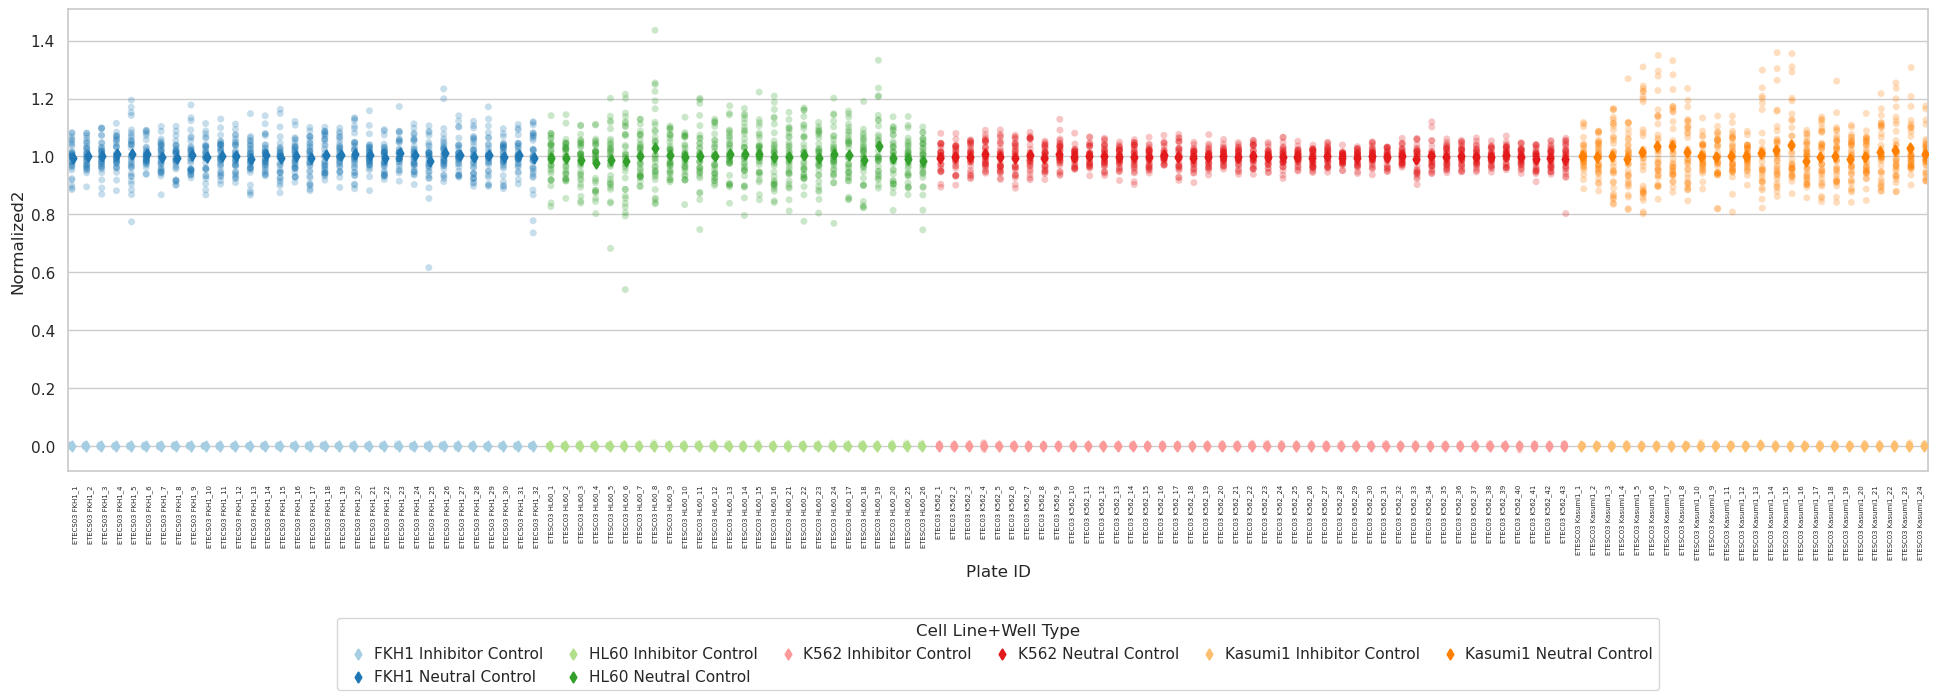

In [22]:
merged['Cell Line+Well Type'] = merged['Cell Line']+' '+merged['Well Type']
controls = merged[(merged['Well Type']=='Inhibitor Control') | (merged['Well Type']=='Neutral Control')]

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(24,6))
sns.stripplot(
    data=controls[['Normalized2','Plate ID', 'Cell Line+Well Type']].reset_index(), x='Plate ID',  y='Normalized2', hue='Cell Line+Well Type', palette='Paired',
    dodge=True, alpha=.25, zorder=1, legend=False, ax=ax)
sns.pointplot(
    data=controls[['Normalized2','Plate ID', 'Cell Line+Well Type']].reset_index(), x='Plate ID', y='Normalized2', hue='Cell Line+Well Type',
    join=False, dodge=.8 - .8 / 3, palette='Paired',
    markers="d", scale=.75, errorbar=None, ax=ax
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=5);
# Improve the legend
sns.move_legend(ax, loc="upper center", bbox_to_anchor=(.5, -0.3), ncol=6, frameon=True, columnspacing=1, handletextpad=0)

#### Reference drug response curves from GDSC2

In [5]:
import zipfile
gdsc = pd.read_csv(PROJECT_PATH / 'data/reference/GDSC2_public_raw_data_24Jul22.csv.zip', compression='zip')
gdsc.head()

,RESEARCH_PROJECT,BARCODE,SCAN_ID,DATE_CREATED,SCAN_DATE,CELL_ID,MASTER_CELL_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,SEEDING_DENSITY,DRUGSET_ID,ASSAY,DURATION,POSITION,TAG,DRUG_ID,CONC,INTENSITY
0,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,1,UN-USED,NaN,NaN,0
1,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,2,UN-USED,NaN,NaN,0
2,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,3,UN-USED,NaN,NaN,398
3,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,4,UN-USED,NaN,NaN,796
4,GDSC_SA,3230,2945,2015-02-13T00:00:00Z,2015-02-17T00:00:00Z,4712,198,753608,PC-14,SIDM00237,250,159,Glo,4,5,UN-USED,NaN,NaN,796


In [64]:
select_cell_lines = ['HL-60']# ['K-562', 'HL-60', 'KASUMI-1']
k5 = gdsc[gdsc['CELL_LINE_NAME'].str.contains('|'.join(select_cell_lines))]

In [65]:
select_drugs = {'1009':'ATRA', '1810':'Mito', '134':'VP16', '1813':'FLD', '1006':'AraC', '1008':'MTX', '1909':'ABT199'}
#gdsc['DRUG_ID'] = gdsc['DRUG_ID'].astype('float').astype('Int64').apply(str)
df = gdsc[ gdsc['CELL_LINE_NAME'].str.contains('|'.join(select_cell_lines)) &
           gdsc['DRUG_ID'].str.contains('|'.join(select_drugs.keys()))    ]
df = df.replace({'DRUG_ID':select_drugs})

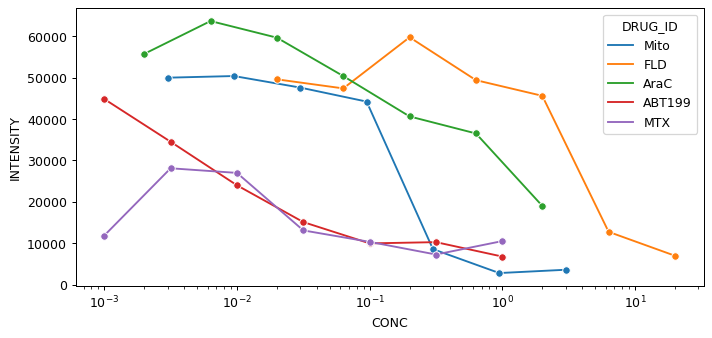

In [66]:
plt.figure(figsize=(9,4), dpi=90)
sns.lineplot(df, x='CONC', y='INTENSITY', hue='DRUG_ID', linestyle='-', marker='o')
plt.xscale('log')
#plt.xlim([0,2.5])